In [1]:
import numpy as np
import pandas as pd
import datetime
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import accuracy_score
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from matplotlib import style

# Get a sample stock price from 2019-01-01 to today




In [2]:
data = yf.download('AAPL','2018-01-01','2020-05-10')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,166.353714,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,166.324722,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.097290,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,168.999741,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,168.372040,20567800


Extract the Close price column to plot



In [3]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any() #chekc for NaN

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    592 non-null    datetime64[ns]
 1   Close   592 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.4 KB


In [5]:
df.head()

,Date,Close
0,2018-01-02,172.259995
1,2018-01-03,172.229996
2,2018-01-04,173.029999
3,2018-01-05,175.000000
4,2018-01-08,174.350006


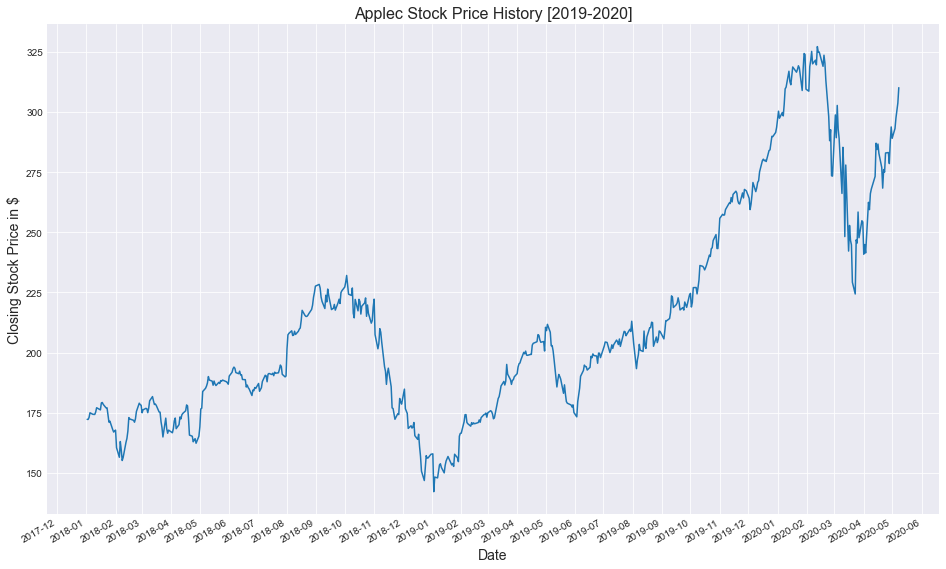

In [6]:
months = mdates.MonthLocator()
dateFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

plt.title('Applec Stock Price History [2019-2020]', fontsize=16)

plt.xlabel('Date', fontsize=14)

plt.ylabel('Closing Stock Price in $', fontsize=14)

fig.autofmt_xdate()

plt.show()

## get stocks of 5 companies

In [3]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-05-10'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('data/close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003


In [6]:
df.index


DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08'],
              dtype='datetime64[ns]', name='Date', length=342, freq=None)

In [7]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

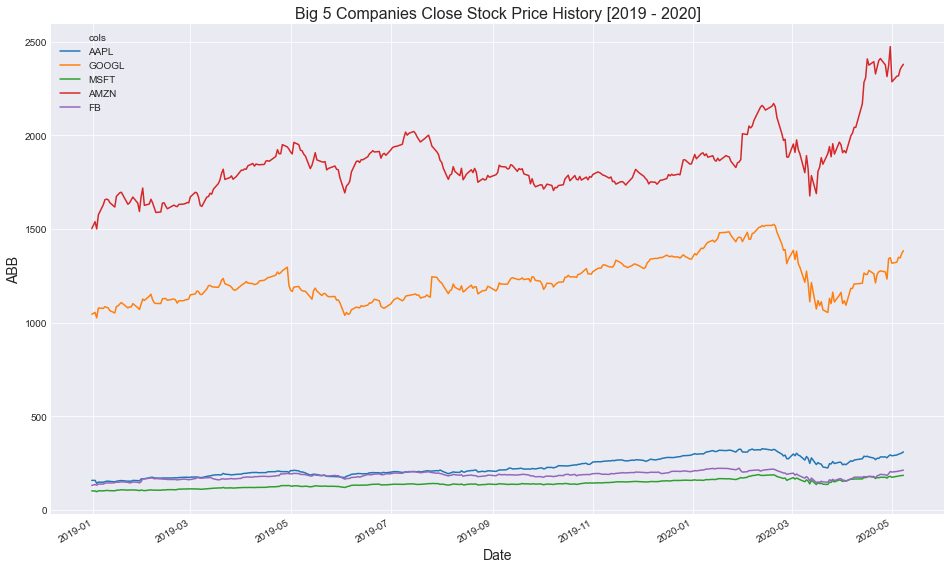

In [8]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('ABB', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [9]:
df1 = df.pct_change() * 100
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
df1

,AAPL,GOOGL,MSFT,AMZN,FB
0,0.114107,0.930188,-0.443041,2.474086,3.501409
1,-9.960737,-2.769568,-3.678799,-2.524152,-2.903882
2,4.268930,5.129353,4.650923,5.006398,4.713824
3,-0.222583,-0.199421,0.127536,3.435339,0.072494
4,1.906312,0.878314,0.725069,1.661232,3.245198
...,...,...,...,...,...
336,1.414881,0.423593,2.446004,1.310124,1.478217
337,1.500885,1.974450,1.073584,0.078155,0.881815
338,1.031727,-0.266117,0.984730,1.443609,0.676097
339,1.034489,1.772666,0.580702,0.695376,1.338319


In [315]:
def get_feature(raw_df):
    
    return ((raw_df.values) / 2).reshape(-1)

def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)-1):
        
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( get_feature(df.iloc[row_idx-history:row_idx,:])) 
        dates.append(df.index[row_idx]) 
            
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
print(n_train)
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

235


In [321]:
clf = LinearRegression()
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)



score_train=clf.score(X_train, y_train);
print(score_train)
score=clf.score(X_test, y_test);
print(score)



0.9511855890879036
0.9152304489485624


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "m

In [322]:
ypred[0], y_test[0]

(array([ 272.33734131, 1345.50013581,  151.43838421, 1746.43519994,
         201.72300954]),
 array([ 271.45999146, 1348.48999023,  153.24000549, 1760.32995605,
         196.75      ]))

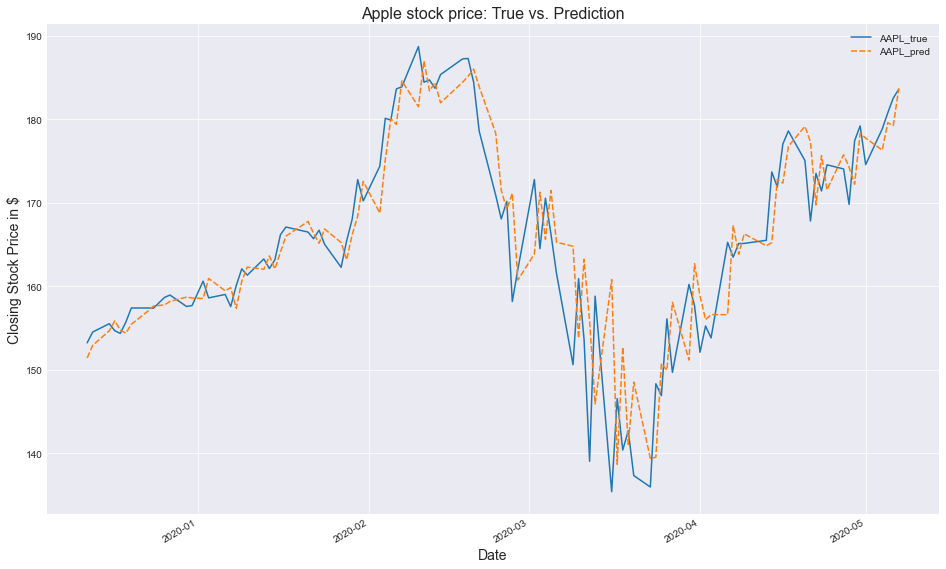

In [323]:

df_plot = pd.DataFrame({"AAPL_true": y_test[:,2], 'AAPL_pred': ypred[:,2]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Apple stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [324]:
from sklearn.metrics import mean_squared_error

In [335]:
def mean_relative_error(y_true, y_pred):
   return np.mean(np.abs((y_pred-y_true)/y_true))

In [336]:
for i in range(5):
    print(df.columns[i], mean_relative_error(y_test[:,i], ypred[:,i]))

AAPL 0.023629202021318633
GOOGL 0.022382096158175067
MSFT 0.025057209803533768
AMZN 0.02006636334023268
FB 0.03556570101432972


# Valuation Model

In [337]:
#MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 16.97324818793774
Mean Squared Error: 967.8129133860696
Root Mean Squared Error: 31.109691631163262


In [338]:
from sklearn import metrics
print('R2: ', metrics.r2_score(y_test, ypred))

R2:  0.8639334815861371
